<a href="https://colab.research.google.com/github/Abhirup2017/MLnow_2.0/blob/main/EDA_%26_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for assignment of the `ML.now()` course

`Univariate Linear Regression`

[Link to Download the dataset](https://drive.google.com/file/d/12538hF4aSIy9LTQvFH_HCq8mxhBomG2C/view?usp=sharing)

**Date Created**: June 6, 2021


**Author**:
Abhirup Bhattacharjee 

**Reach out**:
 [GitHub](https://github.com/Abhirup2017) | [LinkedIn](https://www.linkedin.com/in/abhirup-bhattacharjee-9aa676193?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3B0CB3yyVlRTGPEM0O9kCQFA%3D%3D)

[[Course Repository](https://github.com/Abhirup2017/MLnow_2.0)]

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive/MyDrive/Google Cllab_GirlScript"

/content/drive/MyDrive/Google Cllab_GirlScript


In [3]:
ls

 01_Perceptron_Training.ipynb       Pokemon_Data.csv
'EDA & Univariate Analysis.ipynb'   top_charts.csv


# Importing the important libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #framework
from tensorflow import keras
import seaborn as sns

# Accessing the pokemon data set 

In [7]:
pokemon_data = pd.read_csv("/content/drive/MyDrive/Google Cllab_GirlScript/Pokemon_Data.csv") #reading the data using pandas

In [8]:
pokemon_data #printing the dataset

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


 **So, we have 800 rows and 12 columns**

In [9]:
pokemon_data.head() #reading the first 5 rows

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [10]:
pokemon_data.tail() #reading the last 5 rows

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


## Here we are seeing each column's data type

In [14]:
pokemon_data.info(verbose = True) # using verbose =  True will give you each column's data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sr.no       800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## Checking if there is any null value containing column

In [15]:
print(pokemon_data.isnull().values.any())

True


## Counting how many null values are there

In [13]:
null_columns=pokemon_data.columns[pokemon_data.isnull().any()]
pokemon_data[null_columns].isnull().sum()

Type 2    386
dtype: int64

Only, Type 2 column has 386 null values

## Printing null values with their respective index

In [84]:
print(pokemon_data[pokemon_data.isnull().any(axis="columns")][null_columns])

    Type 2
4      NaN
5      NaN
9      NaN
10     NaN
11     NaN
..     ...
775    NaN
776    NaN
788    NaN
789    NaN
792    NaN

[386 rows x 1 columns]


## Printing unique values

In [85]:
print(pokemon_data.nunique())

Sr.no         721
Name          800
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

## Converting "Legendary" Column into 0,1 

False === 0

True === 1




In [36]:
pokemon_data["Legendary"] = pokemon_data["Legendary"].astype(int)
pokemon_data.head(3)

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0


# **Explotary Data Analysis and Visualization**

Let's get some insight about this pokemon dataset

## 1. Analyzing various statistics lie within the dataset

In [19]:
pokemon_data.describe()

,Sr.no,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


# 2. Let's check, how many pookemons are in Type 1 & Type 2

In [32]:
 type1 = pokemon_data["Type 1"].value_counts().reset_index()
 type1.columns= ["Type1", "Total"]
 type1

,Type1,Total
0,Water,112
1,Normal,98
2,Grass,70
3,Bug,69
4,Psychic,57
5,Fire,52
6,Electric,44
7,Rock,44
8,Dragon,32
9,Ghost,32


In [33]:
type2 = pokemon_data["Type 2"].value_counts().reset_index()
type2.columns= ["Type2", "Total"]
type2

,Type2,Total
0,Flying,97
1,Ground,35
2,Poison,34
3,Psychic,33
4,Fighting,26
5,Grass,25
6,Fairy,23
7,Steel,22
8,Dark,20
9,Dragon,18


# Let's check how many Legendary & and Non_legendary pokemon we have and their percentage

In [69]:
legendary_pokemon = pokemon_data.loc[(pokemon_data["Legendary"]==True)]
len(legendary_pokemon)
Non_legendary_pokemon = pokemon_data.loc[(pokemon_data["Legendary"]==False)]
len(Non_legendary_pokemon)


print(f''' Total legendary & Non_legendary Pokemon we have : 
{len(legendary_pokemon), len(Non_legendary_pokemon)}

''')



 Total legendary & Non_legendary Pokemon we have : 
(65, 735)




## Thier percentage

In [42]:
print(f'''Unique values in column Legendary has :
{pokemon_data["Legendary"].unique()}

Total percentage of Legendary and Non-Legendary pokemon is :
{100*pokemon_data['Legendary'].value_counts()/len(pokemon_data['Legendary'])}

''')


Unique values in column Legendary has :
[0 1]

Total percentage of Legendary and Non-Legendary pokemon is :
0    91.875
1     8.125
Name: Legendary, dtype: float64




# Plotting this percentage on a pie_chart

*Creating a new dataframe*

In [53]:
Legendary_Non_Legendary = 100*pokemon_data['Legendary'].value_counts()/len(pokemon_data['Legendary'])
new_dataframe= Legendary_Non_Legendary.to_frame()
new_dataframe.columns=["Percentage"]
new_dataframe.index=["Non_Legendary", "Legendary"]
new_dataframe

,Percentage
Non_Legendary,91.875
Legendary,8.125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


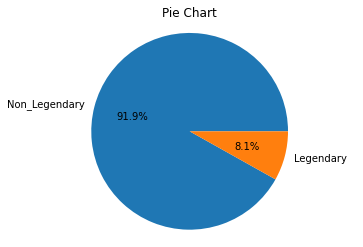

In [55]:
my_labels = 'Non_Legendary','Legendary'
plt.pie(new_dataframe,labels=my_labels,autopct='%1.1f%%')
plt.title('Pie Chart')
plt.axis('equal')
plt.show()

# Which Pokemons in Type 1 have highest Attack?

In [87]:
Median_Attack = pokemon_data.groupby("Type 1")['Attack'].median().reset_index()
Median_Attack

,Type 1,Attack
0,Bug,65.0
1,Dark,88.0
2,Dragon,113.5
3,Electric,65.0
4,Fairy,52.0
5,Fighting,100.0
6,Fire,84.5
7,Flying,85.0
8,Ghost,66.0
9,Grass,70.0


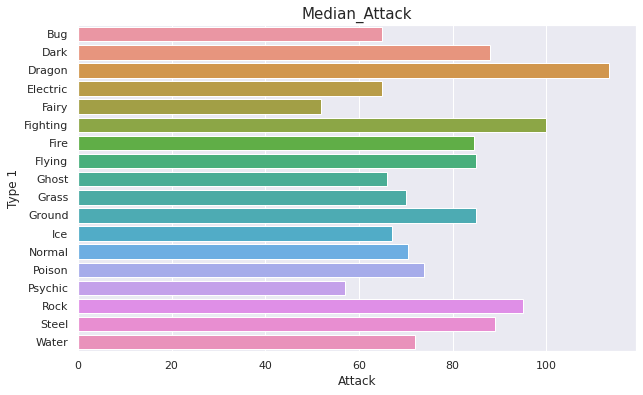

In [107]:
sns.set(rc = {"figure.figsize":[10,6]})
plt.title("Median_Attack",fontdict={"fontsize":15})
sns.barplot(x = "Attack", y="Type 1",data=Median_Attack)
plt.show()

So, Dragon Type pokemon has the highest attack and Fairy type pokemon has the lowest attack

# **Why I choose Median instead of mean?**

Sometimes Mean can be affected by the outliers of the dataset where as median will be remain almost same. Let's comparison between "Mean of Attack" & "Median of Attack". 

Let's take a example!

Analyzing "HP" column with mean & median

In [127]:
Mean_HP= pokemon_data.groupby("Type 1")['HP'].mean().reset_index()
Median_HP = pokemon_data.groupby("Type 1")['HP'].median().reset_index()
Mean_med =pd.merge(Mean_HP, Median_HP , on= "Type 1")
Mean_med.rename(columns = {"HP_x":"Mean", "HP_y":"Median"}, inplace =True)
Mean_med

,Type 1,Mean,Median
0,Bug,56.884058,60.0
1,Dark,66.806452,65.0
2,Dragon,83.312500,80.0
3,Electric,59.795455,60.0
4,Fairy,74.117647,78.0
5,Fighting,69.851852,70.0
6,Fire,69.903846,70.0
7,Flying,70.750000,79.0
8,Ghost,64.437500,59.5
9,Grass,67.271429,65.5


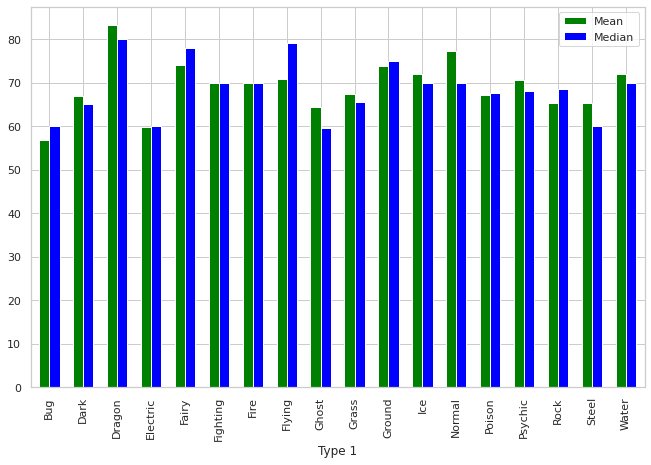

In [128]:
sns.set(rc = {"figure.figsize":[11,7]})
sns.set_style("whitegrid")
plt.ylabel=("Attack")
Mean_med.plot(x ="Type 1", y = ["Mean", "Median"], kind = 'bar', width = 0.6,color =[ "green","blue"])
plt.show()

So, For Normal Pokemon they have much much greater mean HP than median. Which is beacause of outliers.

# Let's check which pokemon has the highest Sp. Defense in Type 1 

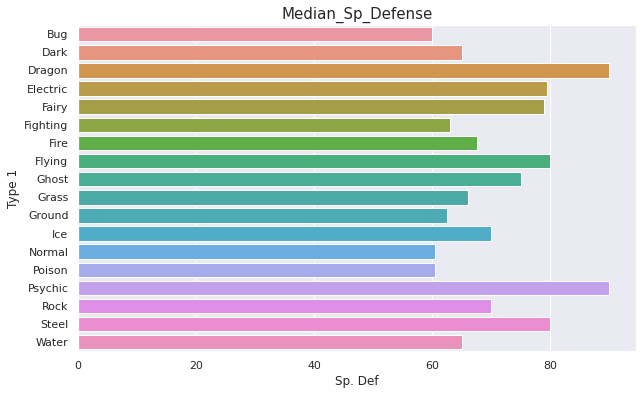

In [135]:
Median_Sp_Defense = pokemon_data.groupby("Type 1")['Sp. Def'].median().reset_index()

sns.set(rc = {"figure.figsize":[10,6]})
plt.title("Median_Sp_Defense",fontdict={"fontsize":15})
sns.barplot(x = "Sp. Def", y="Type 1",data=Median_Sp_Defense)
plt.show()

So, Dragon & Psychic has highest Sp.Def, where as Bug has lowest

In [138]:
print(f'''Unique values in column Legendary has :
{pokemon_data["Generation"].unique()}

Total percentage of Legendary and Non-Legendary pokemon is :
{100*pokemon_data['Generation'].value_counts()/len(pokemon_data['Generation'])}

''')

Unique values in column Legendary has :
[1 2 3 4 5 6]

Total percentage of Legendary and Non-Legendary pokemon is :
1    20.750
5    20.625
3    20.000
4    15.125
2    13.250
6    10.250
Name: Generation, dtype: float64




In [146]:
Generation = 100*pokemon_data['Generation'].value_counts()/len(pokemon_data['Generation'])
new_dataframe= Generation.to_frame()
new_dataframe.columns=["Percentage"]
new_dataframe.index=["Gen_1", "Gen_2", "Gen_3","Gen_4", "Gen_5", "Gen_6"]
new_dataframe

,Percentage
Gen_1,20.750
Gen_2,20.625
Gen_3,20.000
Gen_4,15.125
Gen_5,13.250
Gen_6,10.250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


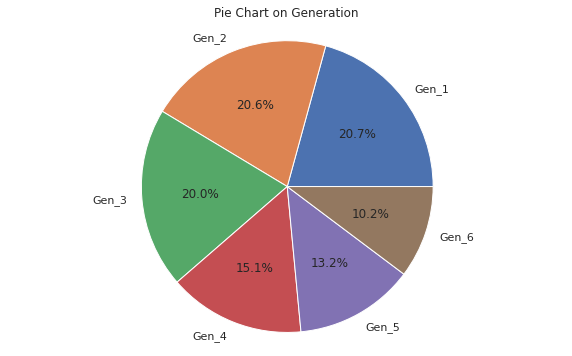

In [148]:
my_labels = "Gen_1", "Gen_2", "Gen_3","Gen_4", "Gen_5", "Gen_6"
plt.pie(new_dataframe,labels=my_labels,autopct='%1.1f%%')
plt.title('Pie Chart on Generation')
plt.axis('equal')
plt.show()